# Exploring Sales Data
- Distribution
- Sales behavior before, during and after holiday
- Seasonal purchase behaviors
- correlation b.n sales and number of customers
- Effect of promo on sales/customer

In [53]:

import imp
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns

import dvc.api


In [54]:

#import custome modules
sys.path.append('../')

from scripts.get_missing_information import MissingInformation
from scripts.get_dataframe_information import DataFrameInformation
from scripts.ploting_utils import Plotters
from scripts.data_clean_handler import CleanData
from scripts import data_loader
from scripts.dvc_data_fetch import DataLoader

dvc_load = DataLoader()
cleaner = CleanData()
minfo = MissingInformation()
dinfo = DataFrameInformation()
plt = Plotters(6,4)

In [55]:
train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test.csv')
store_df = pd.read_csv('../data/cleaned/store.csv')

/var/folders/6b/0t1qb1d92f72c46kvp35pwfc0000gn/T/ipykernel_41283/3481592072.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('../data/raw/train.csv')


In [56]:

# # First load the cleaned stores data
# data_path = 'data/cleaned/store.csv'
# version = 'store_v2'
# repo = '../'

# store_df = dvc_load.dvc_get_data(data_path, version, repo)

# # Then load the raw sales data
# data_path = 'data/merged/train.csv'
# version = 'train_v1'
# repo = '../'

# train_df = dvc_load.dvc_get_data(data_path, version, repo)

# # Finally load the test data
# data_path = 'data/merged/test.csv'
# version = 'test_v1'
# repo = '../'

# test_df = dvc_load.dvc_get_data(data_path, version, repo)


In [57]:
store_df.head()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,none
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,none
4,5,a,a,15700.0,4.0,2015.0,0,0.0,0.0,none


##### Since we have seen the data for store in ***StoreDataExploration.ipynb*** lest see the data eploration for the sales data(train_df)

### Train Data

In [58]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [59]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


##### It contains 1017209 with 9 rows, there is missing values seen from this table.

### Test Data

In [60]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [61]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


##### It contains 41088 with 8 rows, there is missing values seen from this table.

# Date Range of the TS data

In [62]:
print("Training Data")
dinfo.check_date_range(train_df)
print("\nTesting Data")
dinfo.check_date_range(test_df)


Training Data
start_date: 2013-01-01 ----> end_date: 2015-07-31
There are 942 unique dates in the data.
                The number of days between the end and start date is 941

Testing Data
start_date: 2015-08-01 ----> end_date: 2015-09-17
There are 48 unique dates in the data.
                The number of days between the end and start date is 47


## Merge sales with train and test dataframes

In [63]:
train_df = pd.merge(train_df, store_df, how='inner', on='Store')
test_df = pd.merge(test_df, store_df, how='inner', on='Store')
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

#### To avoid the  the string '0' and integer 0 like confusion we perform datatype casting to a certain columns

In [64]:
print(train_df['StateHoliday'].unique())
print(test_df['StateHoliday'].unique())


['0' 'a' 'b' 'c' 0]
['0' 'a']


In [65]:
train_df = cleaner.convert_dtype(train_df, ['StateHoliday'], 'str')
test_df = cleaner.convert_dtype(test_df, ['StateHoliday'], 'str')


In [66]:
print(train_df['StateHoliday'].unique())
print(test_df['StateHoliday'].unique())

['0' 'a' 'b' 'c']
['0' 'a']


The confusion is gone for good now.
- 0 - No holiday
- a - Public Holiday
- b - Easter
- c - Christmas

In [67]:
train_df['Date'] = pd.to_datetime(train_df['Date'], format='%Y-%m-%d')
# train_df['Year'] = train_df['Date'].dt.year
# train_df['Month'] = train_df['Date'].dt.month
train_df['WeekOfYear'] = train_df['Date'].dt.isocalendar().week
train_df['SalesPerCustomer'] = train_df['Sales'] / train_df['Customers']


In [68]:
train_df[['Customers', 'SalesPerCustomer', 'Sales',
          'CompetitionDistance']].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Customers,1017209.0,633.145946,464.411734,0.0,405.000000,609.00,837.000000,7388.000000
SalesPerCustomer,844340.0,9.493619,2.197494,0.0,7.895563,9.25,10.899729,64.957854
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.000000,5744.00,7856.000000,41551.000000
CompetitionDistance,1017209.0,4599.449818,5105.240483,20.0,700.000000,2320.00,6880.000000,15700.000000


## ***Now is a good time to save the merged train and test data, and also track with DVC.***

In [69]:
from operator import index


train_df.to_csv('../data/merged/train.csv',index=False)
test_df.to_csv('../data/merged/test.csv',index=False)

# Group by DayOfWeek, StoreType, and Assortment

### A. DayOfWeek

<AxesSubplot:title={'center':'Sales on each DayOfWeek for 3 years'}, xlabel='DayOfWeek', ylabel='Sales sum per DayOfWeek'>

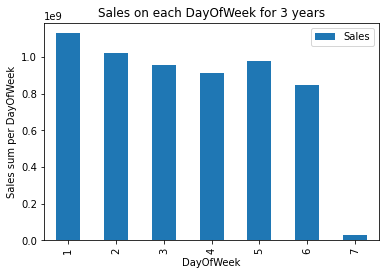

In [70]:
grouped_by_day = train_df.groupby('DayOfWeek')['Sales'].sum().to_frame()
grouped_by_day.plot(kind='bar',
                    xlabel="DayOfWeek",
                    ylabel='Sales sum per DayOfWeek',
                    title='Sales on each DayOfWeek for 3 years',
                    label='DayOfWeek',)
#


The above plot above shows each days sales sum through out the three years. The highest sales is on ***Mondays*** and the Lowest is on ***Sundays***. This observation is assuming the week day starts at Monday. Next, I will group the data with Year in addition to the DayOfWeek to see if the pattern holds.

In [71]:
grouped_by_year_day = train_df.groupby(['Year', 'DayOfWeek'])[
    'Sales'].sum().to_frame()
grouped_by_year_day.plot.bar(xlabel="Year and DayOfWeek",
                             ylabel='Sales sum per DayOfWeek',
                             title='Sales through the Years grouped by DayOfWeek',)



KeyError: 'Year'

This shows us that the above trend holds. In addition, we can see that the sale has been decreasing through the years. Next, I will look at which stores are doing good based on StoreType and Assortment


### B. StoreType

<AxesSubplot:xlabel='StoreType'>

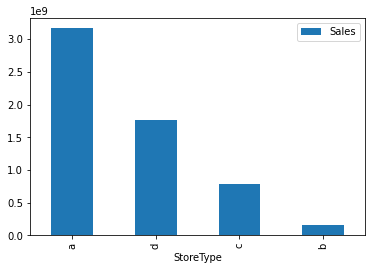

In [ ]:
grouped_by_storetype = train_df.groupby('StoreType')['Sales'].sum(
).to_frame().sort_values(by='Sales', ascending=False)
grouped_by_storetype.plot.bar()


<AxesSubplot:title={'center':'Sales through the Years grouped by StoreType'}, xlabel='Year and StoreType', ylabel='Sales sum per StoreType'>

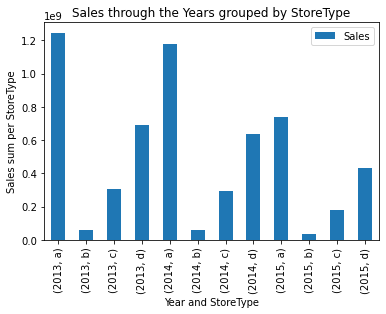

In [ ]:
grouped_by_year_storetype = train_df.groupby(['Year', 'StoreType'])[
    'Sales'].sum().to_frame()
grouped_by_year_storetype.plot.bar(
    xlabel="Year and StoreType", ylabel='Sales sum per StoreType', title='Sales through the Years grouped by StoreType')


In all three years, there is a trend.

Store 'a' has the highest sales. Then 'd', 'c', and 'b' in that order

### C. Assortment

<AxesSubplot:title={'center':'Sales through the Years grouped by Assortment'}, xlabel='Year and Assortment', ylabel='Sales sum per Assorment'>

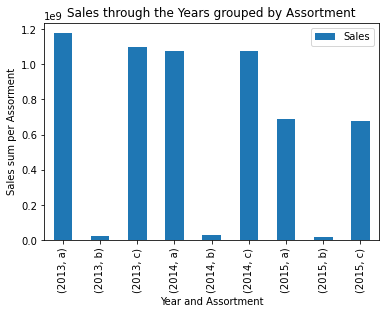

In [ ]:
grouped_by_year_assortment = train_df.groupby(['Year', 'Assortment'])[
    'Sales'].sum().to_frame()
grouped_by_year_assortment.plot.bar(
    xlabel="Year and Assortment", ylabel='Sales sum per Assorment', title='Sales through the Years grouped by Assortment')


## Sales Distribution for the Training and Test Data

<AxesSubplot:xlabel='Sales', ylabel='Count'>

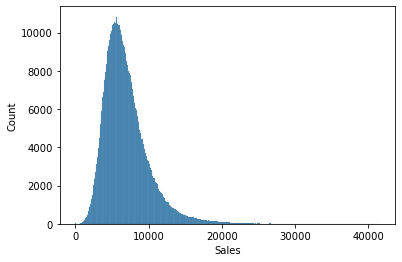

In [ ]:
open_store = train_df.query("Open==1")
open_store = open_store.sort_values(by='Date', ascending=False)

sns.histplot(data=open_store, x='Sales')


For stores open on sunday

<AxesSubplot:xlabel='Sales', ylabel='Count'>

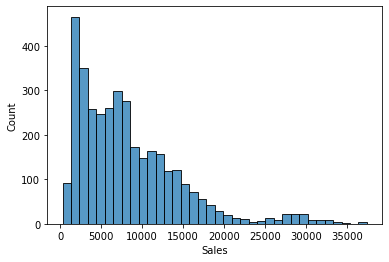

In [ ]:
weekend_open_store = train_df.query("Open==1 & DayOfWeek==7")
weekend_open_store = weekend_open_store.sort_values(by='Date', ascending=False)

sns.histplot(data=weekend_open_store, x='Sales')
